# Untangling fMRI data to classify Alzheimer's codebook


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/oasis_cross-sectional.csv')
data = pd.DataFrame(data)
data['M/F'] = data['M/F'].replace(['M', 'F'], [1,0])
data['CDR'] = data['CDR'].astype(str)
data.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,0,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,0,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,0,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,1,R,28,NaN,NaN,NaN,nan,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,1,R,18,NaN,NaN,NaN,nan,1737,0.848,1.010,NaN


In [ ]:
data.describe()

,M/F,Age,Educ,SES,MMSE,eTIV,nWBV,ASF,Delay
count,436.000000,436.000000,235.000000,216.000000,235.00000,436.000000,436.000000,436.000000,20.00000
mean,0.385321,51.357798,3.178723,2.490741,27.06383,1481.919725,0.791670,1.198894,20.55000
std,0.487230,25.269862,1.311510,1.120593,3.69687,158.740866,0.059937,0.128682,23.86249
min,0.000000,18.000000,1.000000,1.000000,14.00000,1123.000000,0.644000,0.881000,1.00000
25%,0.000000,23.000000,2.000000,2.000000,26.00000,1367.750000,0.742750,1.111750,2.75000
50%,0.000000,54.000000,3.000000,2.000000,29.00000,1475.500000,0.809000,1.190000,11.00000
75%,1.000000,74.000000,4.000000,3.000000,30.00000,1579.250000,0.842000,1.284250,30.75000
max,1.000000,96.000000,5.000000,5.000000,30.00000,1992.000000,0.893000,1.563000,89.00000


## Some visualizations

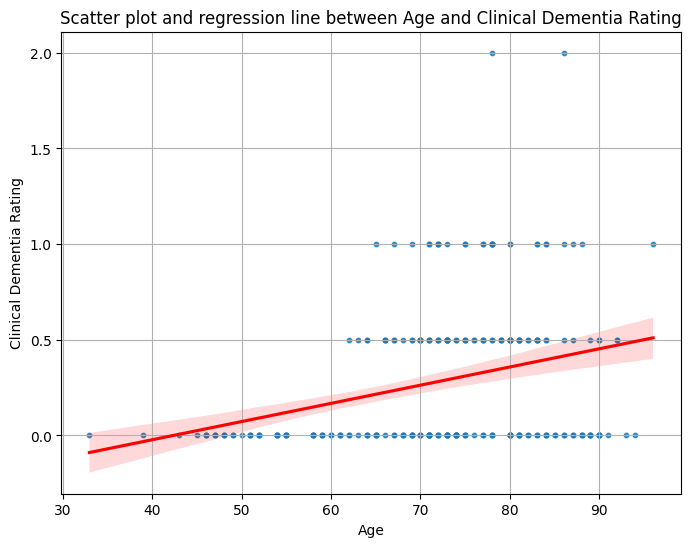

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=data['Age'], y=data['CDR'], data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title(f'Scatter plot and regression line between Age and Clinical Dementia Rating')
plt.xlabel('Age')
plt.ylabel('Clinical Dementia Rating')
plt.grid(True)
plt.show()

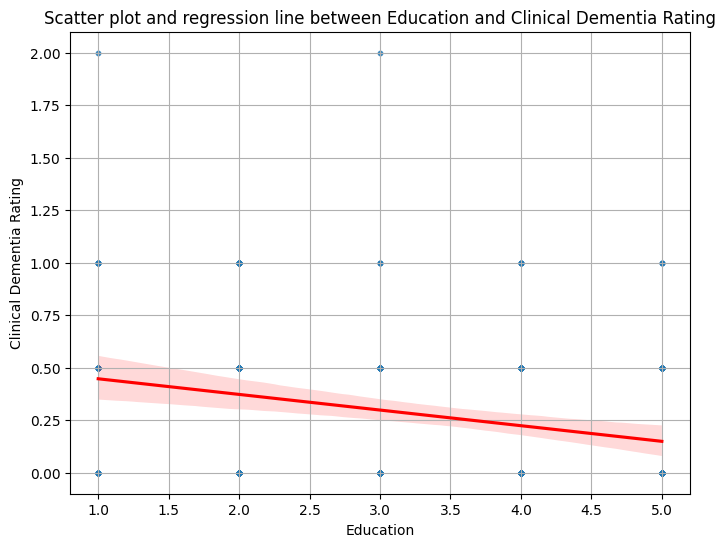

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=data['Educ'], y=data['CDR'], data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title(f'Scatter plot and regression line between Education and Clinical Dementia Rating')
plt.xlabel('Education')
plt.ylabel('Clinical Dementia Rating')
plt.grid(True)
plt.show()

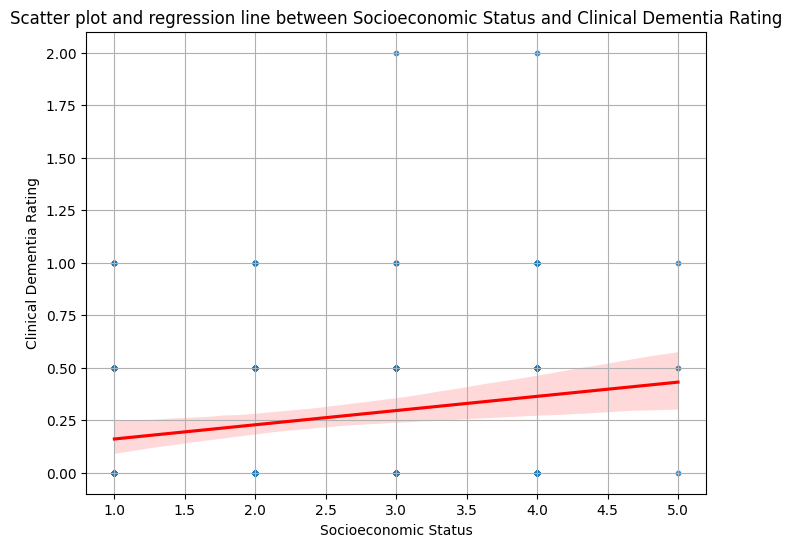

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=data['SES'], y=data['CDR'], data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title(f'Scatter plot and regression line between Socioeconomic Status and Clinical Dementia Rating')
plt.xlabel('Socioeconomic Status')
plt.ylabel('Clinical Dementia Rating')
plt.grid(True)
plt.show()

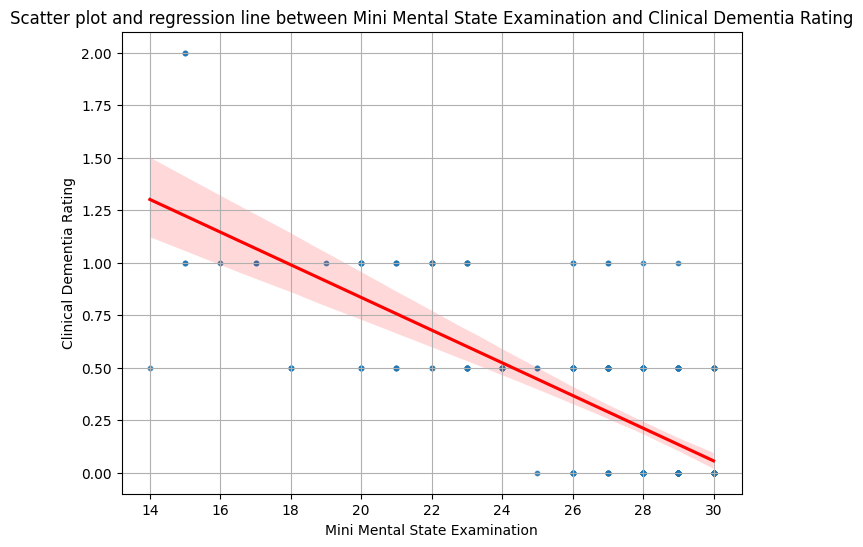

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=data['MMSE'], y=data['CDR'], data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title(f'Scatter plot and regression line between Mini Mental State Examination and Clinical Dementia Rating')
plt.xlabel('Mini Mental State Examination')
plt.ylabel('Clinical Dementia Rating')
plt.grid(True)
plt.show()

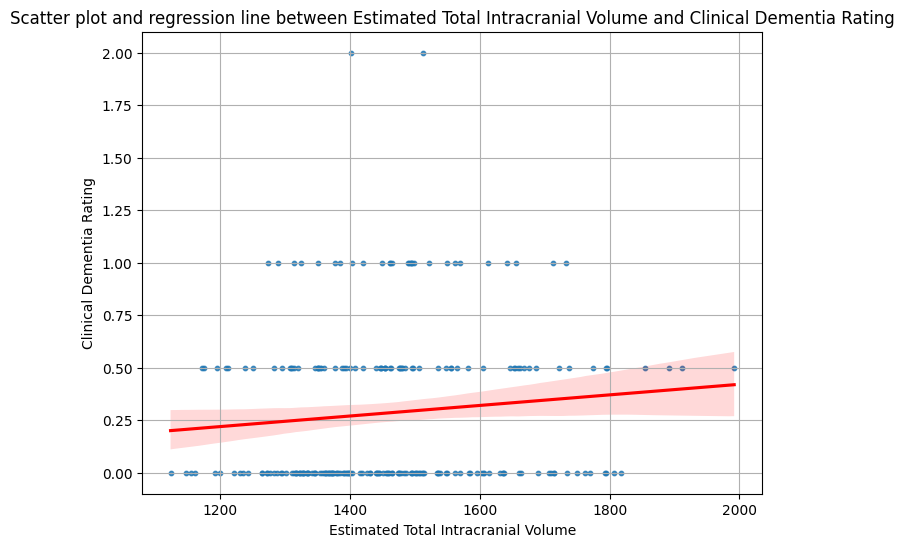

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=data['eTIV'], y=data['CDR'], data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title(f'Scatter plot and regression line between Estimated Total Intracranial Volume and Clinical Dementia Rating')
plt.xlabel('Estimated Total Intracranial Volume')
plt.ylabel('Clinical Dementia Rating')
plt.grid(True)
plt.show()

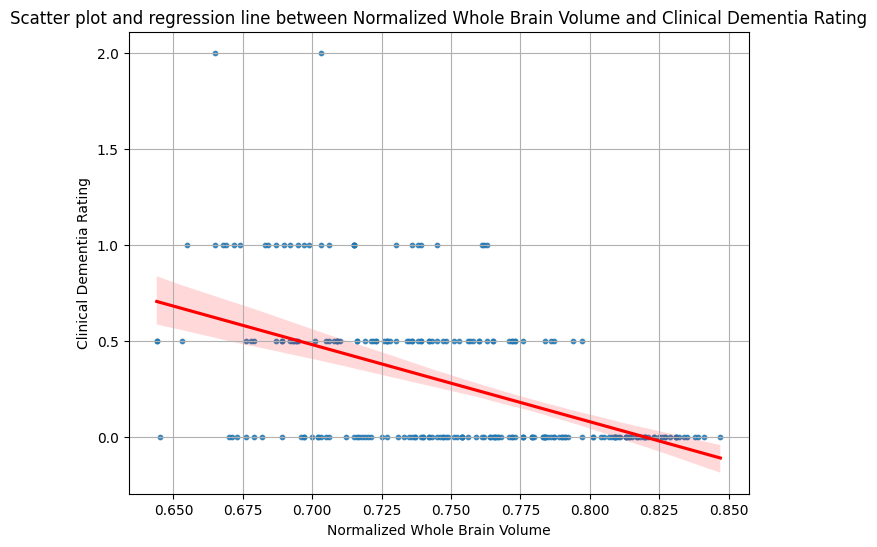

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=data['nWBV'], y=data['CDR'], data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title(f'Scatter plot and regression line between Normalized Whole Brain Volume and Clinical Dementia Rating')
plt.xlabel('Normalized Whole Brain Volume')
plt.ylabel('Clinical Dementia Rating')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.impute  import SimpleImputer
# We perform it with the most frequent value
imputer = SimpleImputer ( missing_values = np.nan,strategy='most_frequent')

imputer.fit(data[['SES']])
data[['SES']] = imputer.fit_transform(data[['SES']])

# We perform it with the median
imputer = SimpleImputer (missing_values = np.nan,strategy='median')

imputer.fit(data[['MMSE']])
data[['MMSE']] = imputer.fit_transform(data[['MMSE']])

imputer = SimpleImputer ( missing_values = np.nan,strategy='median')

imputer.fit(data[['Educ']])
data[['Educ']] = imputer.fit_transform(data[['Educ']])

In [ ]:
data.dropna(subset=['CDR'], inplace=True)
data.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,0,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,0,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,0,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,1,R,28,3.0,2.0,29.0,nan,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,1,R,18,3.0,2.0,29.0,nan,1737,0.848,1.010,NaN


In [ ]:
data.drop(['Hand','Delay','ID'], axis=1, inplace = True)
data.head()

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,0,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,0,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,1,28,3.0,2.0,29.0,nan,1588,0.803,1.105
4,1,18,3.0,2.0,29.0,nan,1737,0.848,1.010


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X = data.drop(["CDR"],axis=1)
y = data["CDR"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train)

     M/F  Age  Educ  SES  MMSE  eTIV   nWBV    ASF
265    0   69   1.0  2.0  26.0  1384  0.783  1.268
405    0   92   4.0  1.0  24.0  1388  0.739  1.264
31     1   51   5.0  1.0  29.0  1538  0.831  1.141
84     1   20   3.0  2.0  29.0  1728  0.862  1.016
299    0   54   3.0  2.0  29.0  1467  0.821  1.196
..   ...  ...   ...  ...   ...   ...    ...    ...
71     0   18   3.0  2.0  29.0  1501  0.839  1.169
106    1   62   2.0  4.0  30.0  1378  0.804  1.274
270    0   90   2.0  3.0  29.0  1475  0.671  1.190
348    0   38   3.0  2.0  29.0  1562  0.844  1.123
102    1   84   3.0  4.0  28.0  1483  0.697  1.183

[348 rows x 8 columns]


<ipython-input-26-0723d93c351a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


(8.5, -0.5)

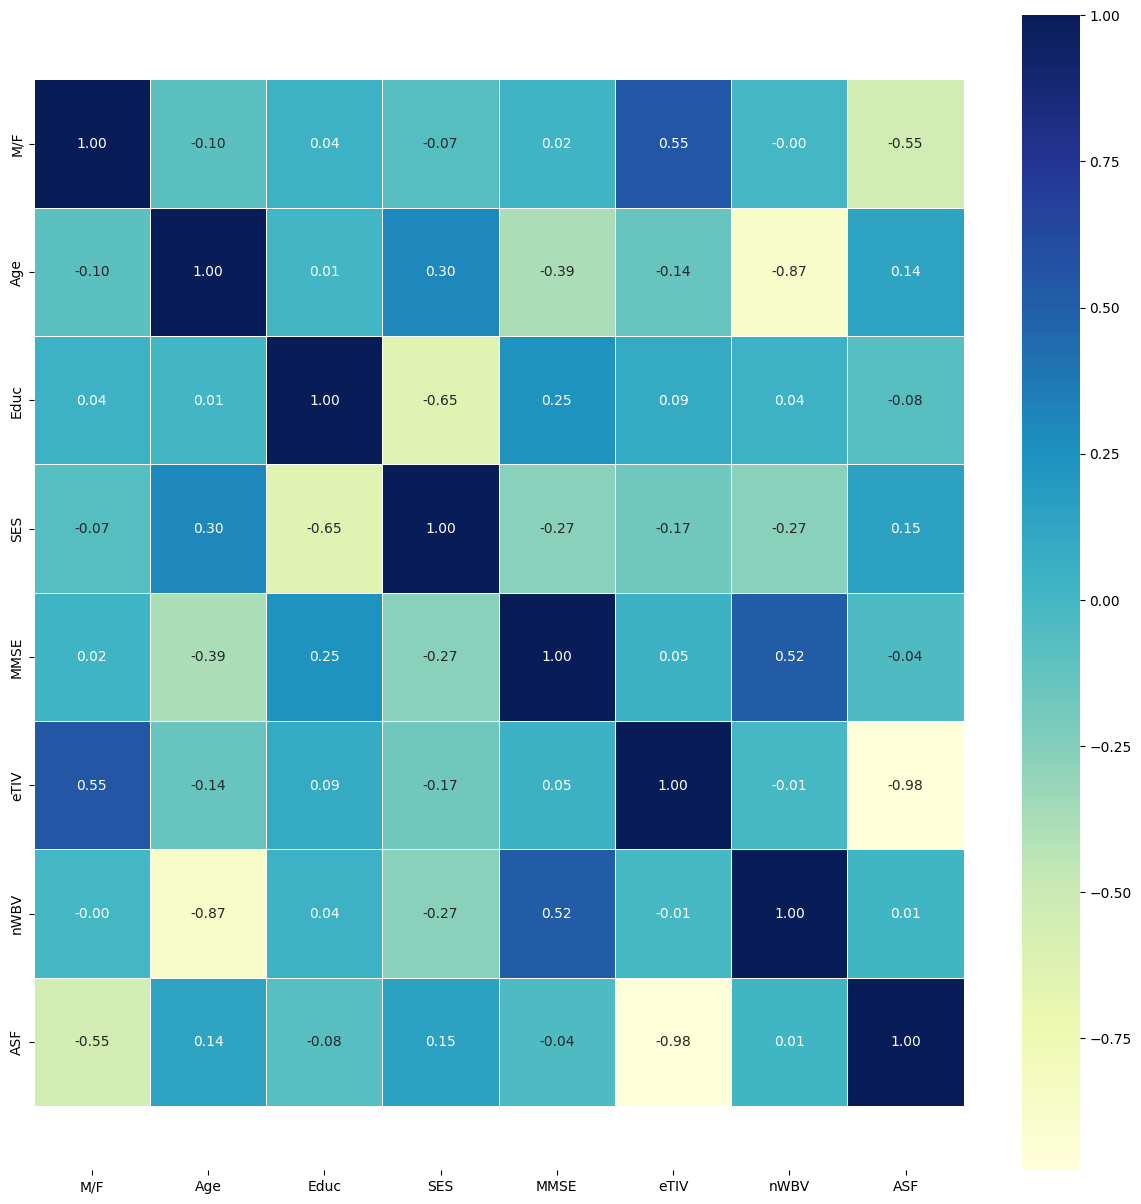

In [ ]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_model.fit(X_train_scaled, y_train)
lr_predictions1 = lr_model.predict(X_train_scaled)
lr_accuracy1 = accuracy_score(y_train, lr_predictions1)
lr_predictions2 = lr_model.predict(X_test_scaled)
lr_accuracy2 = accuracy_score(y_test, lr_predictions2)
print_score(lr_model, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(lr_model, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Train Result:
Accuracy Score: 82.76%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        0.5        1.0  2.0         nan  accuracy  \
precision    0.776860   0.625000   0.545455  0.0    0.956250  0.827586   
recall       0.854545   0.593220   0.285714  0.0    0.974522  0.827586   
f1-score     0.813853   0.608696   0.375000  0.0    0.965300  0.827586   
support    110.000000  59.000000  21.000000  1.0  157.000000  0.827586   

            macro avg  weighted avg  
precision    0.580713      0.815849  
recall       0.541600      0.827586  
f1-score     0.552570      0.818574  
support    348.000000    348.000000  
_______________________________________________
Confusion Matrix: 
 [[ 94   9   0   0   7]
 [ 20  35   4   0   0]
 [  3  12   6   0   0]
 [  0   0   1   0   0]
 [  4   0   0   0 153]]

Test Result:
Accuracy Score: 78.41%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        0.5  1.0  2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train_scaled, y_train)
rfc_predictions1 = rfc_model.predict(X_train_scaled)
rfc_accuracy1 = accuracy_score(y_train, rfc_predictions1)
rfc_predictions2 = rfc_model.predict(X_test_scaled)
rfc_accuracy2 = accuracy_score(y_test, rfc_predictions2)
print("RFC Accuracy:", rfc_accuracy)
print_score(rfc_model, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(rfc_model, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

RFC Accuracy: 0.8409090909090909
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             0.0   0.5   1.0  2.0    nan  accuracy  macro avg  weighted avg
precision    1.0   1.0   1.0  1.0    1.0       1.0        1.0           1.0
recall       1.0   1.0   1.0  1.0    1.0       1.0        1.0           1.0
f1-score     1.0   1.0   1.0  1.0    1.0       1.0        1.0           1.0
support    110.0  59.0  21.0  1.0  157.0       1.0      348.0         348.0
_______________________________________________
Confusion Matrix: 
 [[110   0   0   0   0]
 [  0  59   0   0   0]
 [  0   0  21   0   0]
 [  0   0   0   1   0]
 [  0   0   0   0 157]]

Test Result:
Accuracy Score: 81.82%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        0.5       1.0  2.0        nan  accuracy  \
precision   0.785714   0.400000  0.500000  0.0   1.000000  0.818182   
recall      0.880000   0.545455  0.142857  0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train_scaled, y_train)
dtc_predictions1 = dtc_model.predict(X_train_scaled)
dtc_accuracy1 = accuracy_score(y_train, dtc_predictions1)
dtc_predictions2 = dtc_model.predict(X_test_scaled)
dtc_accuracy2 = accuracy_score(y_test, dtc_predictions2)
print("DTC Accuracy:", dtc_accuracy)
print_score(lr_model, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(lr_model, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

DTC Accuracy: 0.7954545454545454
Train Result:
Accuracy Score: 82.76%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        0.5        1.0  2.0         nan  accuracy  \
precision    0.776860   0.625000   0.545455  0.0    0.956250  0.827586   
recall       0.854545   0.593220   0.285714  0.0    0.974522  0.827586   
f1-score     0.813853   0.608696   0.375000  0.0    0.965300  0.827586   
support    110.000000  59.000000  21.000000  1.0  157.000000  0.827586   

            macro avg  weighted avg  
precision    0.580713      0.815849  
recall       0.541600      0.827586  
f1-score     0.552570      0.818574  
support    348.000000    348.000000  
_______________________________________________
Confusion Matrix: 
 [[ 94   9   0   0   7]
 [ 20  35   4   0   0]
 [  3  12   6   0   0]
 [  0   0   1   0   0]
 [  4   0   0   0 153]]

Test Result:
Accuracy Score: 78.41%
_______________________________________________
CLASSIFICATION REPORT:
      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(decision_function_shape = 'ovo')
svc_model.fit(X_train_scaled, y_train)
svc_predictions1 = svc_model.predict(X_train_scaled)
svc_accuracy1 = accuracy_score(y_train, svc_predictions1)
svc_predictions2 = svc_model.predict(X_test_scaled)
svc_accuracy2 = accuracy_score(y_test, svc_predictions2)
print_score(svc_model, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(svc_model, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Train Result:
Accuracy Score: 87.07%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        0.5        1.0  2.0         nan  accuracy  \
precision    0.814516   0.711538   0.750000  0.0    0.975000   0.87069   
recall       0.918182   0.627119   0.428571  0.0    0.993631   0.87069   
f1-score     0.863248   0.666667   0.545455  0.0    0.984227   0.87069   
support    110.000000  59.000000  21.000000  1.0  157.000000   0.87069   

            macro avg  weighted avg  
precision    0.650211      0.863226  
recall       0.593500      0.870690  
f1-score     0.611919      0.862841  
support    348.000000    348.000000  
_______________________________________________
Confusion Matrix: 
 [[101   5   0   0   4]
 [ 19  37   3   0   0]
 [  3   9   9   0   0]
 [  0   1   0   0   0]
 [  1   0   0   0 156]]

Test Result:
Accuracy Score: 78.41%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        0.5  1.0  2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_predictions1 = knn_model.predict(X_train_scaled)
knn_accuracy1 = accuracy_score(y_train, knn_predictions1)
knn_predictions2 = knn_model.predict(X_test_scaled)
knn_accuracy2 = accuracy_score(y_test, knn_predictions2)
print_score(knn_model, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(knn_model, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Train Result:
Accuracy Score: 84.77%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        0.5        1.0  2.0         nan  accuracy  \
precision    0.793388   0.632653   0.687500  0.0    0.969136  0.847701   
recall       0.872727   0.525424   0.523810  0.0    1.000000  0.847701   
f1-score     0.831169   0.574074   0.594595  0.0    0.984326  0.847701   
support    110.000000  59.000000  21.000000  1.0  157.000000  0.847701   

            macro avg  weighted avg  
precision    0.616535      0.836756  
recall       0.584392      0.847701  
f1-score     0.596833      0.840013  
support    348.000000    348.000000  
_______________________________________________
Confusion Matrix: 
 [[ 96   9   0   0   5]
 [ 23  31   5   0   0]
 [  2   8  11   0   0]
 [  0   1   0   0   0]
 [  0   0   0   0 157]]

Test Result:
Accuracy Score: 73.86%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        0.5  1.0  2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, le.fit_transform(y_train))
xgb_predictions1 = xgb_model.predict(X_train_scaled)
xgb_accuracy1 = accuracy_score(le.fit_transform(y_train), xgb_predictions1)
xgb_predictions2 = xgb_model.predict(X_test_scaled)
xgb_accuracy2 = accuracy_score(le.fit_transform(y_test), xgb_predictions2)
print_score(xgb_model, X_train_scaled, le.fit_transform(y_train), X_test_scaled, le.fit_transform(y_test), train=True)
print_score(xgb_model, X_train_scaled, le.fit_transform(y_train), X_test_scaled, le.fit_transform(y_test), train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1     2    3      4  accuracy  macro avg  weighted avg
precision    1.0   1.0   1.0  1.0    1.0       1.0        1.0           1.0
recall       1.0   1.0   1.0  1.0    1.0       1.0        1.0           1.0
f1-score     1.0   1.0   1.0  1.0    1.0       1.0        1.0           1.0
support    110.0  59.0  21.0  1.0  157.0       1.0      348.0         348.0
_______________________________________________
Confusion Matrix: 
 [[110   0   0   0   0]
 [  0  59   0   0   0]
 [  0   0  21   0   0]
 [  0   0   0   1   0]
 [  0   0   0   0 157]]

Test Result:
Accuracy Score: 79.55%
_______________________________________________
CLASSIFICATION REPORT:
              0          1         2    3          4  accuracy  macro avg  \
precision   0.8   0.333333  0.400000  0.0   1.000000  0.795455   0.506667   
recall      0.8   0.454545  0.285714  0.0   0.977273  0.795455   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(base_estimator = rfc_model)
ada_model.fit(X_train_scaled, y_train)
ada_predictions1 = ada_model.predict(X_train_scaled)
ada_accuracy1 = accuracy_score(y_train, ada_predictions1)
ada_predictions2 = ada_model.predict(X_test_scaled)
ada_accuracy2 = accuracy_score(y_test, ada_predictions2)
print_score(ada_model, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(ada_model, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             0.0   0.5   1.0  2.0    nan  accuracy  macro avg  weighted avg
precision    1.0   1.0   1.0  1.0    1.0       1.0        1.0           1.0
recall       1.0   1.0   1.0  1.0    1.0       1.0        1.0           1.0
f1-score     1.0   1.0   1.0  1.0    1.0       1.0        1.0           1.0
support    110.0  59.0  21.0  1.0  157.0       1.0      348.0         348.0
_______________________________________________
Confusion Matrix: 
 [[110   0   0   0   0]
 [  0  59   0   0   0]
 [  0   0  21   0   0]
 [  0   0   0   1   0]
 [  0   0   0   0 157]]

Test Result:
Accuracy Score: 79.55%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        0.5       1.0  2.0        nan  accuracy  \
precision   0.750000   0.312500  1.000000  0.0   1.000000  0.795455   
recall      0.840000   0.454545  0.142857  0.0   0.977273  0.795455   
f1-sco

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)
gnb_predictions1 = gnb_model.predict(X_train_scaled)
gnb_accuracy1 = accuracy_score(y_train, gnb_predictions1)
gnb_predictions2 = gnb_model.predict(X_test_scaled)
gnb_accuracy2 = accuracy_score(y_test, gnb_predictions2)
print_score(ada_model, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(ada_model, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             0.0   0.5   1.0  2.0    nan  accuracy  macro avg  weighted avg
precision    1.0   1.0   1.0  1.0    1.0       1.0        1.0           1.0
recall       1.0   1.0   1.0  1.0    1.0       1.0        1.0           1.0
f1-score     1.0   1.0   1.0  1.0    1.0       1.0        1.0           1.0
support    110.0  59.0  21.0  1.0  157.0       1.0      348.0         348.0
_______________________________________________
Confusion Matrix: 
 [[110   0   0   0   0]
 [  0  59   0   0   0]
 [  0   0  21   0   0]
 [  0   0   0   1   0]
 [  0   0   0   0 157]]

Test Result:
Accuracy Score: 79.55%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        0.5       1.0  2.0        nan  accuracy  \
precision   0.750000   0.312500  1.000000  0.0   1.000000  0.795455   
recall      0.840000   0.454545  0.142857  0.0   0.977273  0.795455   
f1-sco

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
results_df = pd.DataFrame(data=[["Logistic Regression", lr_accuracy1, lr_accuracy2],
                                ["K-Nearest Neighbors", knn_accuracy1, knn_accuracy2],
                                ["Support Vector Machine", svc_accuracy1, svc_accuracy2],
                                ["Gaussian Naive Bayes", gnb_accuracy1, gnb_accuracy2],
                                ["Decision Trees", dtc_accuracy1, dtc_accuracy2],
                                ["Random Forest", rfc_accuracy1, rfc_accuracy2],
                                ["XGBoost", xgb_accuracy1, xgb_accuracy2],
                                ["AdaBoost", ada_accuracy1, ada_accuracy2]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,0.827586,0.784091
1,K-Nearest Neighbors,0.847701,0.738636
2,Support Vector Machine,0.870690,0.784091
3,Gaussian Naive Bayes,0.853448,0.818182
4,Decision Trees,1.000000,0.795455
5,Random Forest,1.000000,0.818182
6,XGBoost,1.000000,0.795455
7,AdaBoost,1.000000,0.795455
